# **Overview:**
Chương trình này là tiếp nối của chương trình Part-1_Data_process.ipynb.


Chương trình sẽ đưa ra cái nhìn tổng quan nhất về dữ liệu sau xử lý và trước khi đưa vào mô hình


# **4. Tổng quan về dữ liệu**

In [ ]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip;

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from pandas_profiling import ProfileReport

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,9

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit_Scoring/Test/13.12/data_filled.csv')

In [ ]:
df

,Unnamed: 0,LoanBriefID,LoanAmount,LoanTime,IsReMarketing,ProvinceId,Gender,Age,JobId,ImcomeType,IsMerried,NumberBaby,RelationshipType,LivingWith,RateTypeId,ProductId,ResidentType,LoanAmountExpertiseAI,NumberCall,score,label_result
0,0,1095199,30000000,12,0,1,0.0,31,123.0,1.0,1.0,1.0,1.0,1.0,10,5,6,48800000.0,0.0,1.0,True
1,1,950035,12000000,6,1,1,0.0,30,123.0,5.0,1.0,2.0,1.0,3.0,10,2,4,13600000.0,1.0,0.6,False
2,2,975972,10000000,9,1,1,0.0,29,123.0,1.0,1.0,1.0,1.0,2.0,10,5,4,24000000.0,1.0,0.9,True
3,3,943144,5000000,9,1,79,0.0,25,123.0,5.0,0.0,0.0,2.0,1.0,10,2,4,0.0,8.0,0.9,True
4,4,1015972,16000000,9,0,1,0.0,28,123.0,1.0,0.0,1.0,15.0,0.0,10,2,7,24100000.0,0.0,0.4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,10195,1801710,12000000,12,0,26,0.0,35,123.0,5.0,1.0,2.0,1.0,0.0,13,2,14,17900000.0,0.0,0.9,True
10196,10196,1803670,10000000,12,0,1,0.0,34,126.0,1.0,1.0,3.0,9.0,1.0,13,5,14,28050000.0,0.0,0.9,True
10197,10197,1800734,10000000,12,0,79,0.0,31,123.0,1.0,0.0,0.0,4.0,0.0,13,2,14,33400000.0,0.0,0.9,True
10198,10198,1751348,7000000,12,0,1,0.0,35,126.0,1.0,1.0,2.0,1.0,2.0,13,2,15,10300000.0,0.0,0.7,True


In [ ]:
df.shape

(10200, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10200 non-null  int64  
 1   LoanBriefID            10200 non-null  int64  
 2   LoanAmount             10200 non-null  int64  
 3   LoanTime               10200 non-null  int64  
 4   IsReMarketing          10200 non-null  int64  
 5   ProvinceId             10200 non-null  int64  
 6   Gender                 10200 non-null  float64
 7   Age                    10200 non-null  int64  
 8   JobId                  10200 non-null  float64
 9   ImcomeType             10200 non-null  float64
 10  IsMerried              10200 non-null  float64
 11  NumberBaby             10200 non-null  float64
 12  RelationshipType       10200 non-null  float64
 13  LivingWith             10200 non-null  float64
 14  RateTypeId             10200 non-null  int64  
 15  Pr

In [ ]:
#Kiểm tra giá trị Null
df.isnull().sum()

Unnamed: 0               0
LoanBriefID              0
LoanAmount               0
LoanTime                 0
IsReMarketing            0
ProvinceId               0
Gender                   0
Age                      0
JobId                    0
ImcomeType               0
IsMerried                0
NumberBaby               0
RelationshipType         0
LivingWith               0
RateTypeId               0
ProductId                0
ResidentType             0
LoanAmountExpertiseAI    0
NumberCall               0
score                    0
label_result             0
dtype: int64

In [ ]:
# Phân tích thống kê của tập dữ liệu
df.describe()

,Unnamed: 0,LoanBriefID,LoanAmount,LoanTime,IsReMarketing,ProvinceId,Gender,Age,JobId,ImcomeType,IsMerried,NumberBaby,RelationshipType,LivingWith,RateTypeId,ProductId,ResidentType,LoanAmountExpertiseAI,NumberCall,score
count,10200.000000,1.020000e+04,1.020000e+04,10200.000000,10200.00000,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000,1.020000e+04,10200.000000,10200.000000
mean,5099.500000,1.148678e+06,9.942108e+06,10.662941,0.32402,44.291961,0.272745,31.537255,111.714608,2.495784,0.575882,0.724804,5.552745,1.367353,10.720098,3.723431,6.308137,1.770107e+07,1.122451,0.806000
std,2944.630707,2.308395e+05,5.293893e+06,2.025216,0.46803,38.040734,0.445393,8.179630,26.667137,1.925971,0.494233,0.918405,4.572151,0.985756,1.283360,1.489803,3.925531,1.366949e+07,2.505999,0.204191
min,0.000000,8.495710e+05,3.000000e+06,0.000000,0.00000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2549.750000,9.796505e+05,6.000000e+06,9.000000,0.00000,1.000000,0.000000,25.000000,117.000000,1.000000,0.000000,0.000000,2.000000,1.000000,10.000000,2.000000,4.000000,9.000000e+06,0.000000,0.700000
50%,5099.500000,1.063458e+06,9.000000e+06,12.000000,0.00000,79.000000,0.000000,30.000000,123.000000,1.000000,1.000000,0.000000,4.000000,1.000000,10.000000,5.000000,4.000000,1.450000e+07,0.000000,0.900000
75%,7649.250000,1.229474e+06,1.400000e+07,12.000000,1.00000,79.000000,1.000000,36.000000,123.000000,5.000000,1.000000,1.000000,6.000000,2.000000,10.000000,5.000000,7.000000,2.380000e+07,1.000000,0.900000
max,10199.000000,1.813794e+06,3.000000e+07,12.000000,1.00000,79.000000,1.000000,60.000000,126.000000,5.000000,1.000000,4.000000,15.000000,5.000000,14.000000,5.000000,15.000000,9.350000e+07,32.000000,1.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'LoanBriefID', 'LoanAmount', 'LoanTime', 'IsReMarketing',
       'ProvinceId', 'Gender', 'Age', 'JobId', 'ImcomeType', 'IsMerried',
       'NumberBaby', 'RelationshipType', 'LivingWith', 'RateTypeId',
       'ProductId', 'ResidentType', 'LoanAmountExpertiseAI', 'NumberCall',
       'score', 'label_result'],
      dtype='object')

**Phân tích tổng thể**

In [ ]:
# profile = ProfileReport(df)

In [ ]:
# profile

### **Phân loại: giá trị phân loại (categorial value) và giá trị số (numerical value)**

**Giá trị phân loại**

In [ ]:
# Các trường được xếp là giá trị phân loại
cate_features = ['LoanTime','IsReMarketing', 'ProvinceId', 'JobId',
       'Gender',  'ImcomeType', 'IsMerried', 'ProductId', 'RateTypeId',
       'ResidentType', 'RelationshipType','label_result']

In [ ]:
cate_df = df[cate_features]
cate_df.head()

,LoanTime,IsReMarketing,ProvinceId,JobId,Gender,ImcomeType,IsMerried,ProductId,RateTypeId,ResidentType,RelationshipType,label_result
0,12,0,1,123.0,0.0,1.0,1.0,5,10,6,1.0,True
1,6,1,1,123.0,0.0,5.0,1.0,2,10,4,1.0,False
2,9,1,1,123.0,0.0,1.0,1.0,5,10,4,1.0,True
3,9,1,79,123.0,0.0,5.0,0.0,2,10,4,2.0,True
4,9,0,1,123.0,0.0,1.0,0.0,2,10,7,15.0,False


In [ ]:
# Kiểm tra số trường phân biệt của các trường phân loại
cate_df.nunique()

LoanTime             5
IsReMarketing        2
ProvinceId           5
JobId               77
Gender               2
ImcomeType           4
IsMerried            2
ProductId            3
RateTypeId           3
ResidentType        16
RelationshipType    15
label_result         2
dtype: int64

In [ ]:
# Hiển thị những giá trị phân loại của mỗi trường 
def find_unique(col):
  print(col,":",cate_df[col].unique())
for col in cate_df.columns:
  find_unique(col)

LoanTime : [12  6  9  0  3]
IsReMarketing : [0 1]
ProvinceId : [ 1 79 30 27 26]
JobId : [123.  26. 124.  71. 126. 106. 121.  48.  63.  50. 112. 104. 100.  62.
  43. 118. 111. 125.  59. 116.  98. 101.  32. 117.  42. 109.  99.  30.
  44.  72.  97. 113.  31.  10.   6.  60.  76.  38. 115.  29.  41.  95.
 108.  58. 114. 110.  70.  73.  39. 103.  78.  37.  52.   0.  77.  22.
  24.  96. 105.  35.  65.  64.  49.  33.  92.  61.  68.  75.   1. 102.
  36.  46. 107.   4.  66.  40.   2.]
Gender : [0. 1.]
ImcomeType : [1. 5. 2. 0.]
IsMerried : [1. 0.]
ProductId : [5 2 1]
RateTypeId : [10 13 14]
ResidentType : [ 6  4  7 15 14  9  2 13  0  1 11  3  8 12 10  5]
RelationshipType : [ 1.  2. 15.  5.  4.  6. 10.  3. 13. 14. 12.  9.  7. 11.  8.]
label_result : [ True False]


**Giá trị số**

In [ ]:
num_feature = ['LoanAmount', 'Age', 'NumberBaby', 'LivingWith',
                'LoanAmountExpertiseAI', 'NumberCall', 'score']

In [ ]:
num_df = df[num_feature]
num_df.head()

,LoanAmount,Age,NumberBaby,LivingWith,LoanAmountExpertiseAI,NumberCall,score
0,30000000,31,1.0,1.0,48800000.0,0.0,1.0
1,12000000,30,2.0,3.0,13600000.0,1.0,0.6
2,10000000,29,1.0,2.0,24000000.0,1.0,0.9
3,5000000,25,0.0,1.0,0.0,8.0,0.9
4,16000000,28,1.0,0.0,24100000.0,0.0,0.4


# **5. Trực quan hóa dữ liệu (Data Visualization)**

In [ ]:
# giá trị phân loại
def plot_bar_graph(column_name):
    ed_count = column_name.value_counts()
    sns.set(style="darkgrid")
    sns.barplot(ed_count.index, ed_count.values, alpha=0.9)
    plt.title('Phân phối tần xuất của {} sử dụng Bar Plot'.format(column_name.name))
    plt.ylabel('Số lần xuất hiện', fontsize=12)
    plt.xlabel('{}'.format(column_name.name), fontsize=12)
    plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


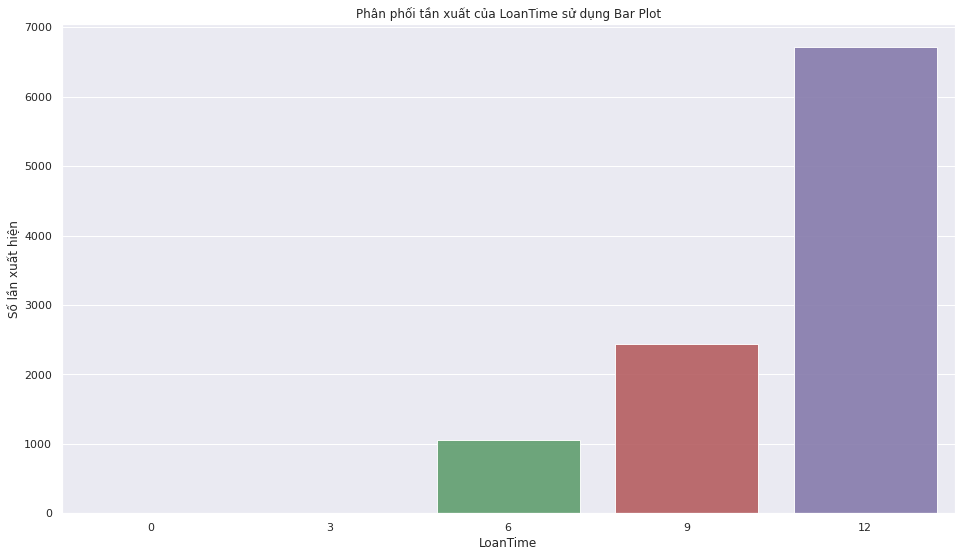

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


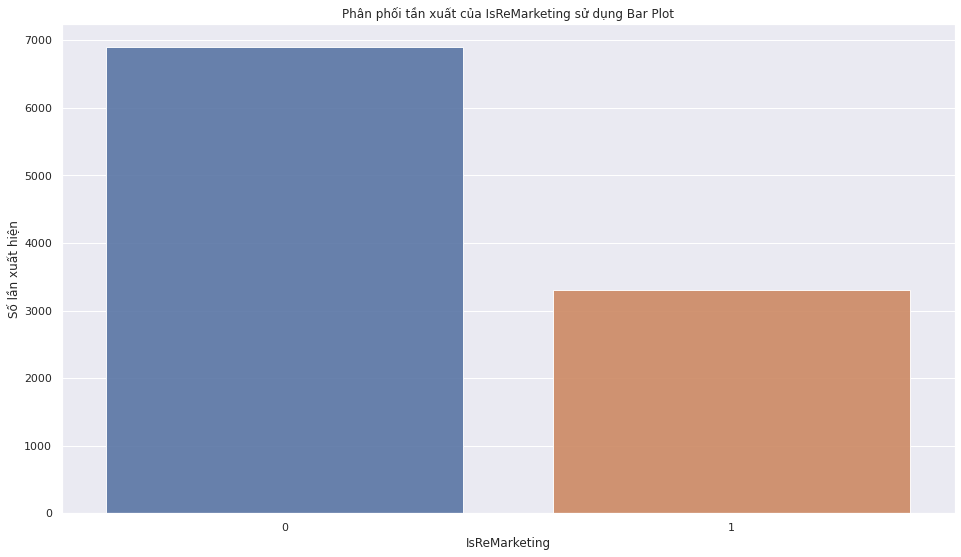

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


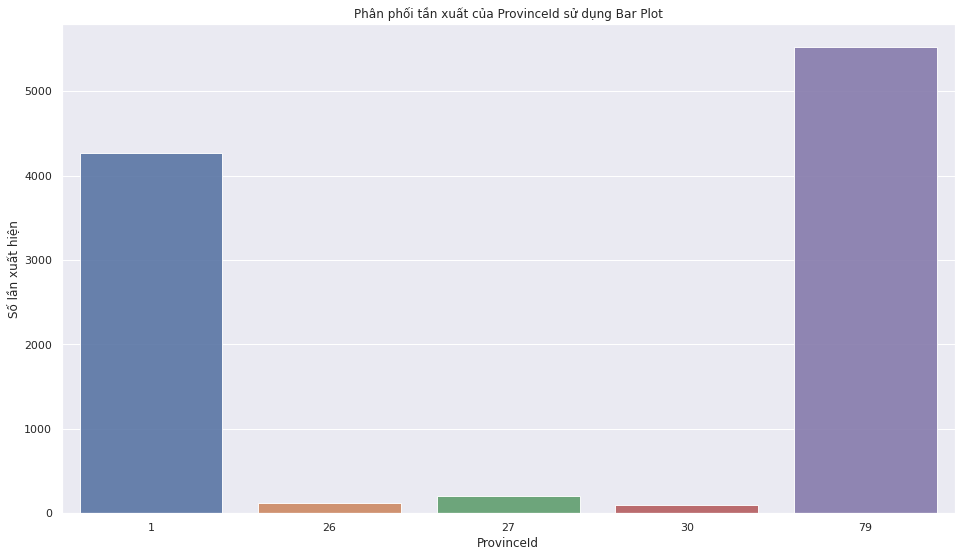

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


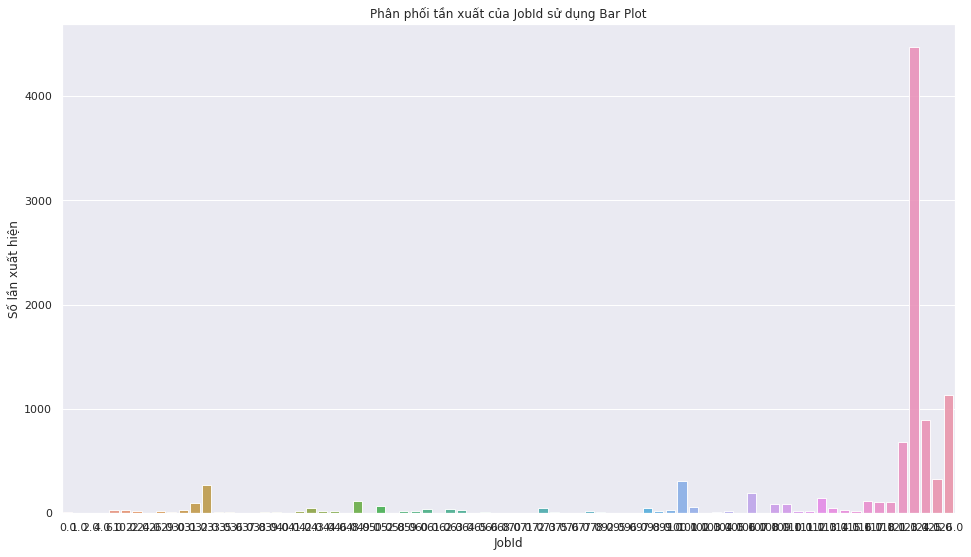

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


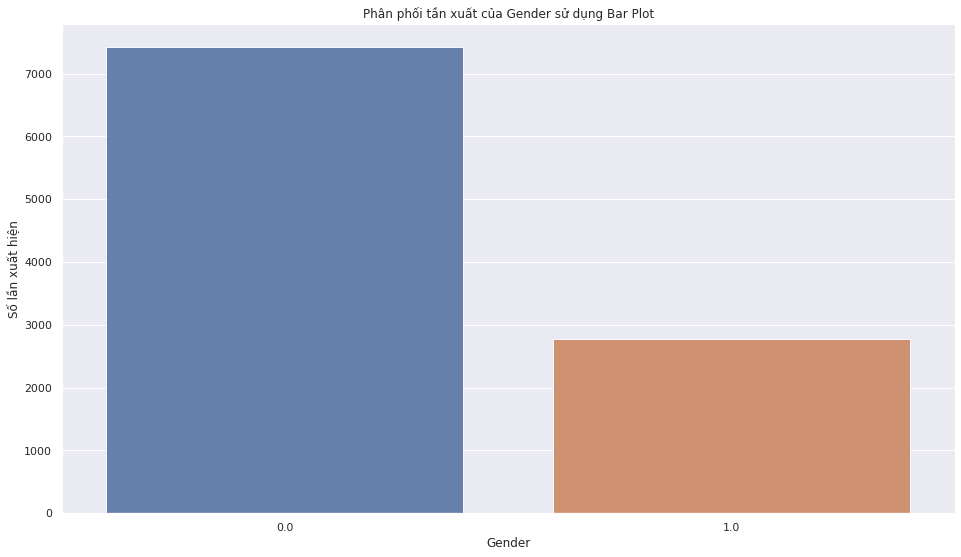

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


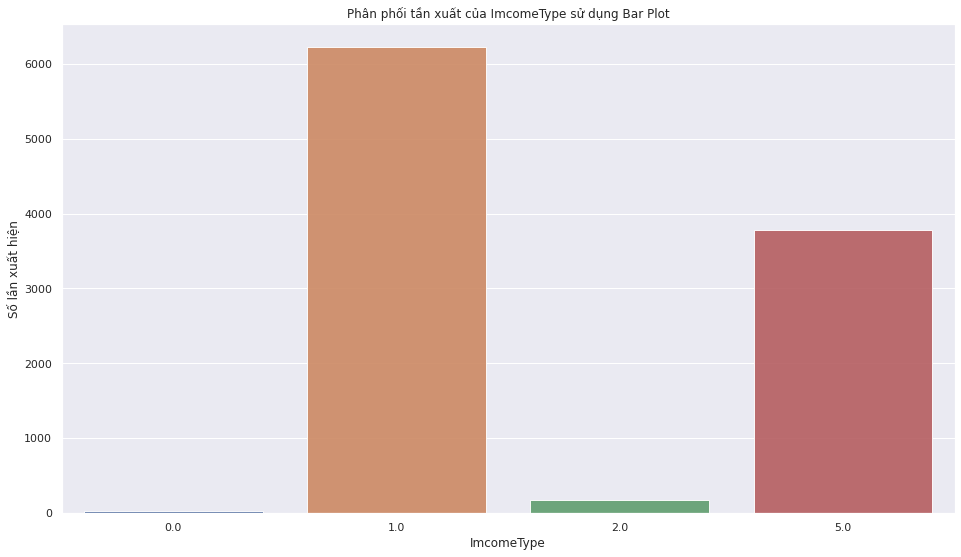

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


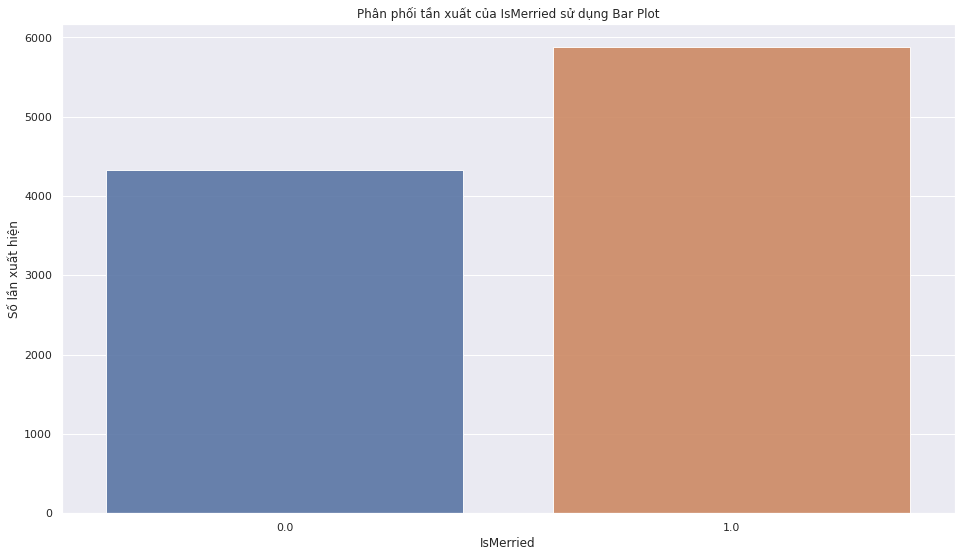

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


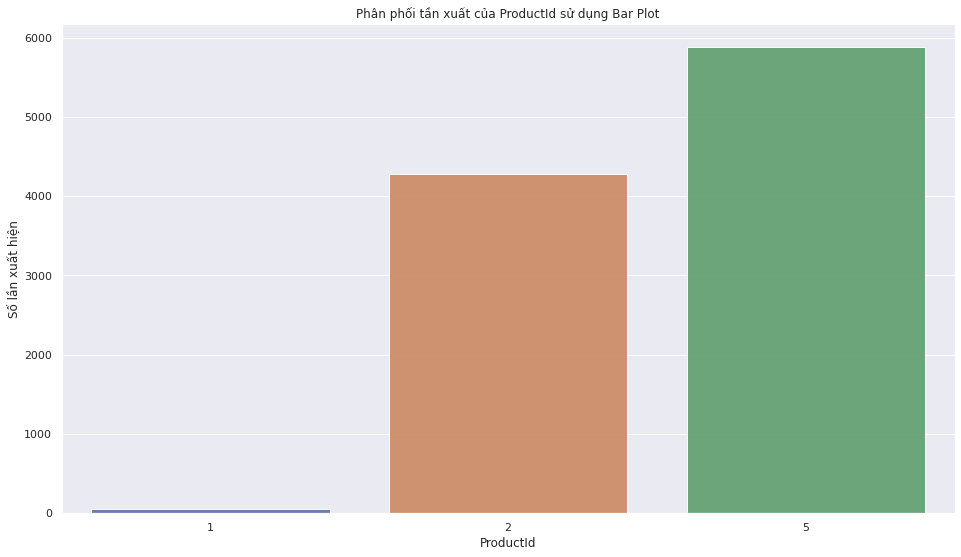

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


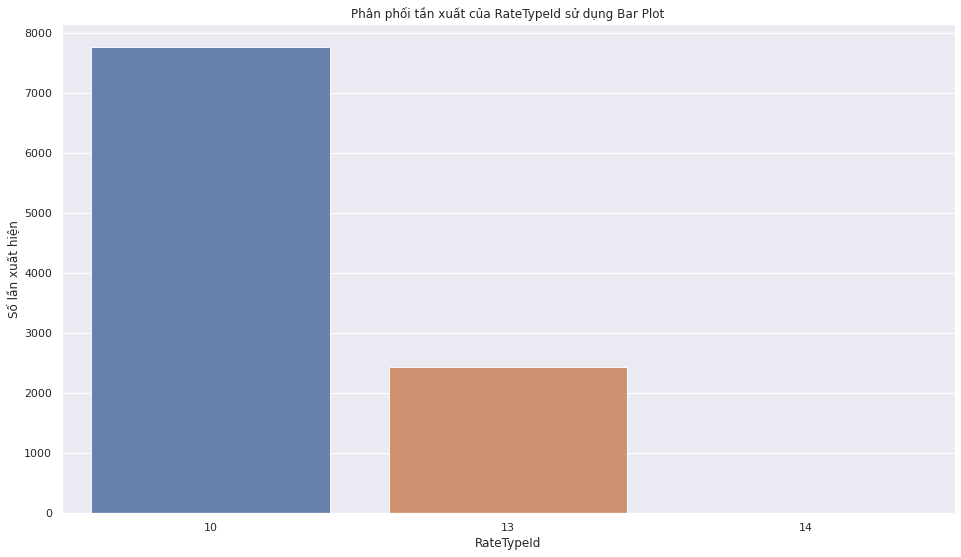

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


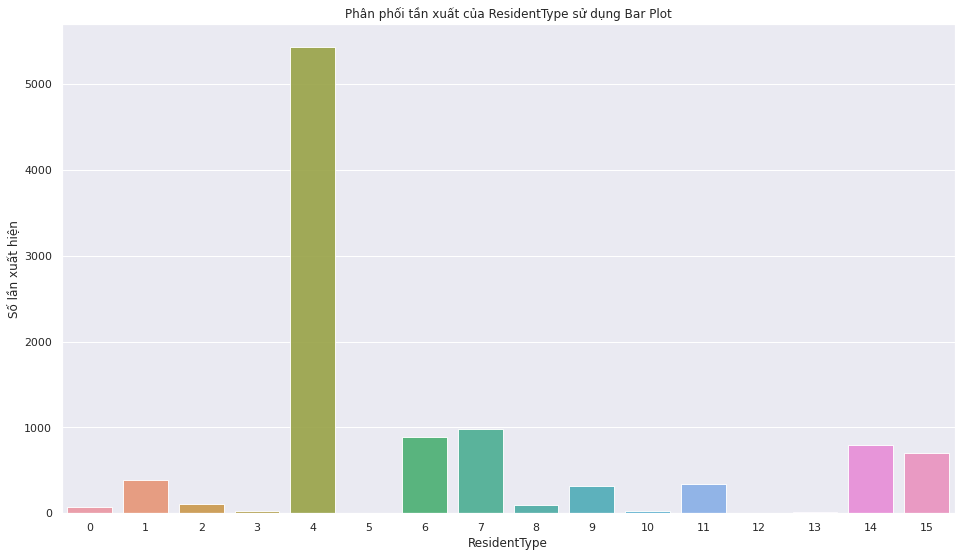

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


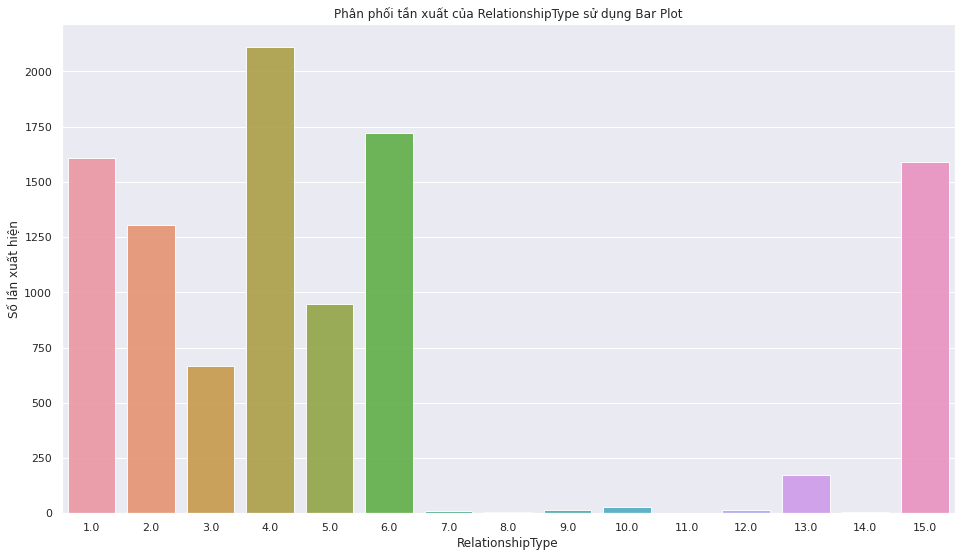

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


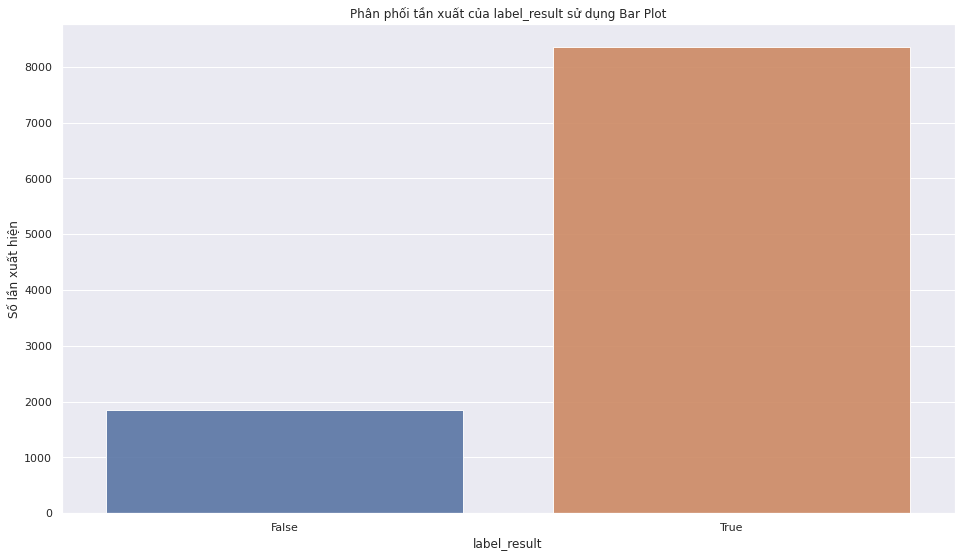

In [ ]:
for i in cate_df.columns:
  plot_bar_graph(cate_df[i])


In [ ]:
# giá trị số
def distplot_graph(column_name):
    sns.set(style="darkgrid")
    sns.distplot(num_df[column_name], color="g")
    plt.title('Phân phối chuẩn của {} sử dụng Bar Plot'.format(column_name))    
    plt.xlabel('{}'.format(column_name), fontsize=12)
    plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


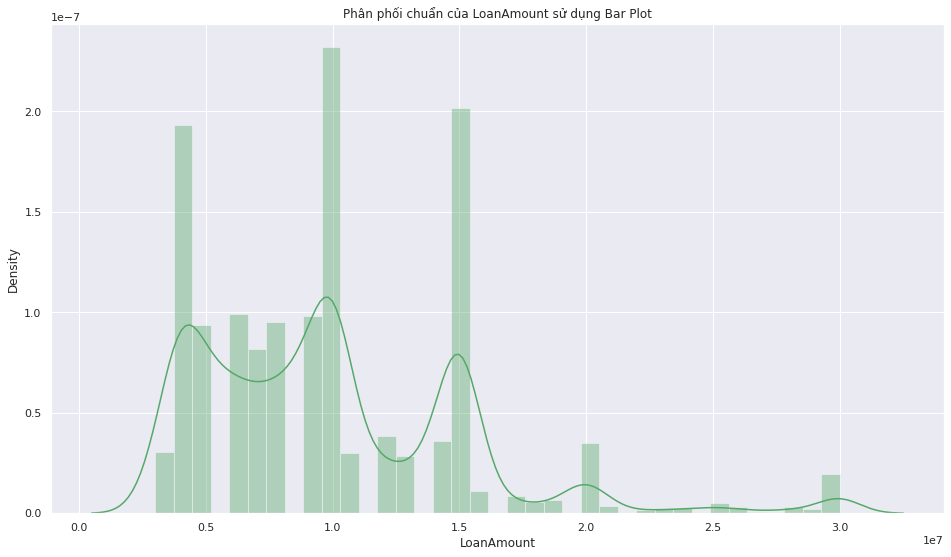

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


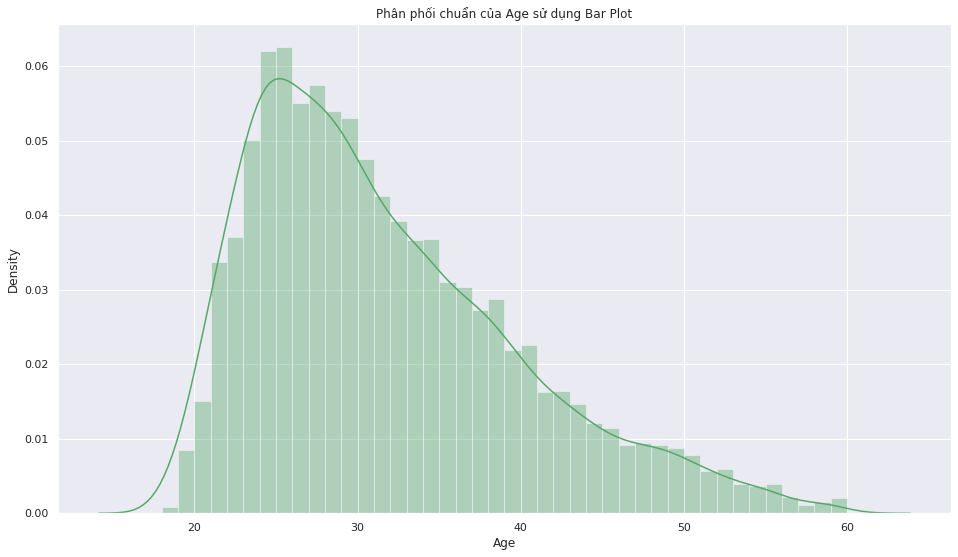

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


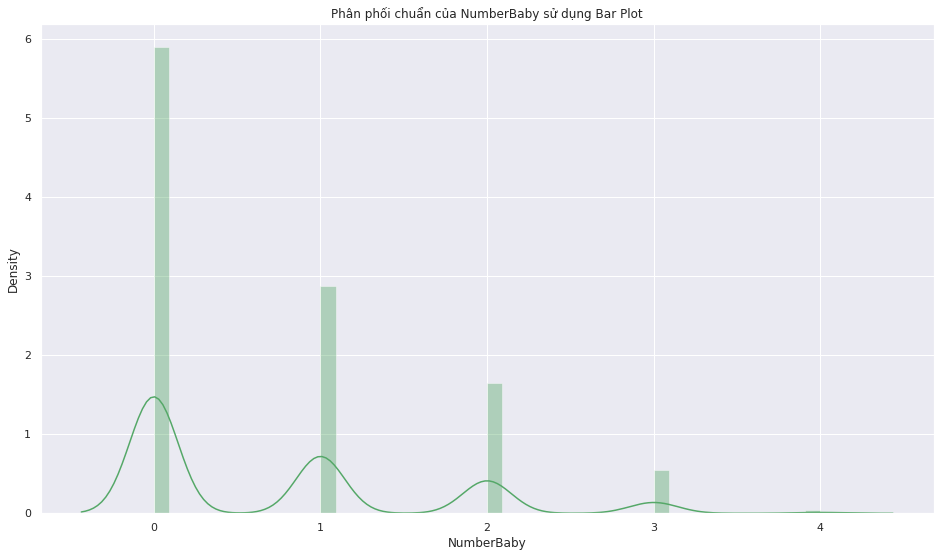

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


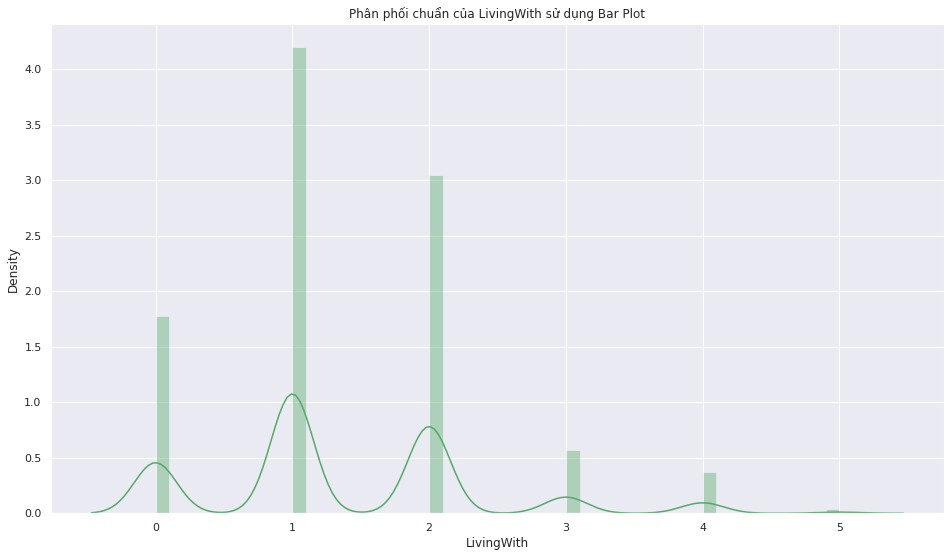

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


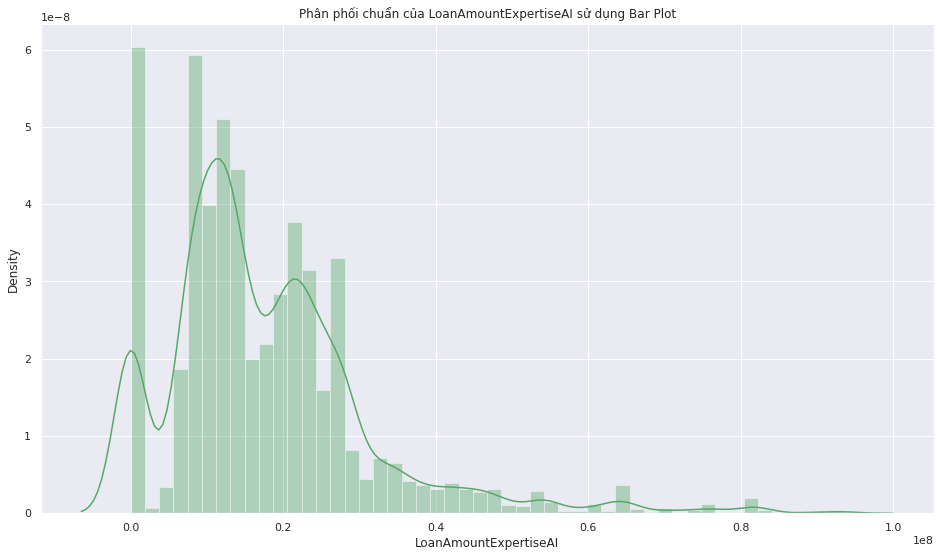

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


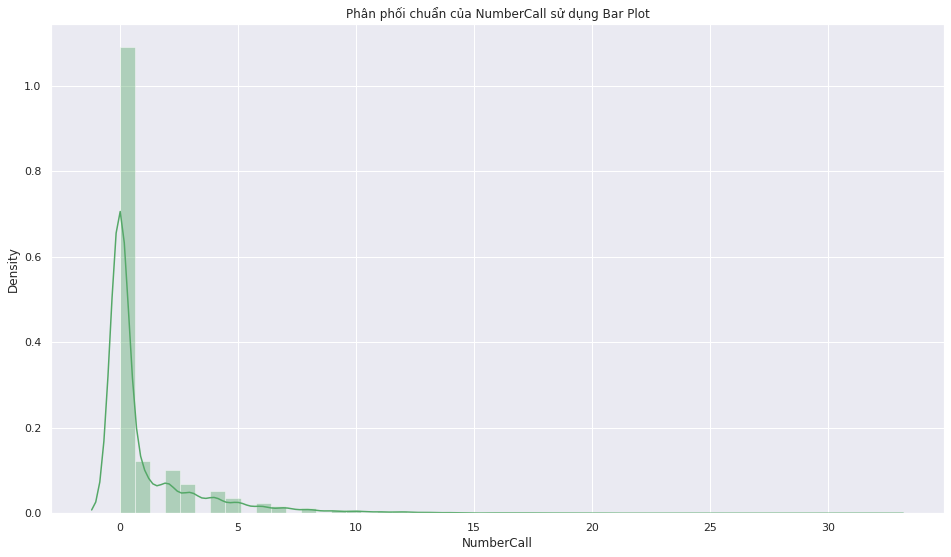

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


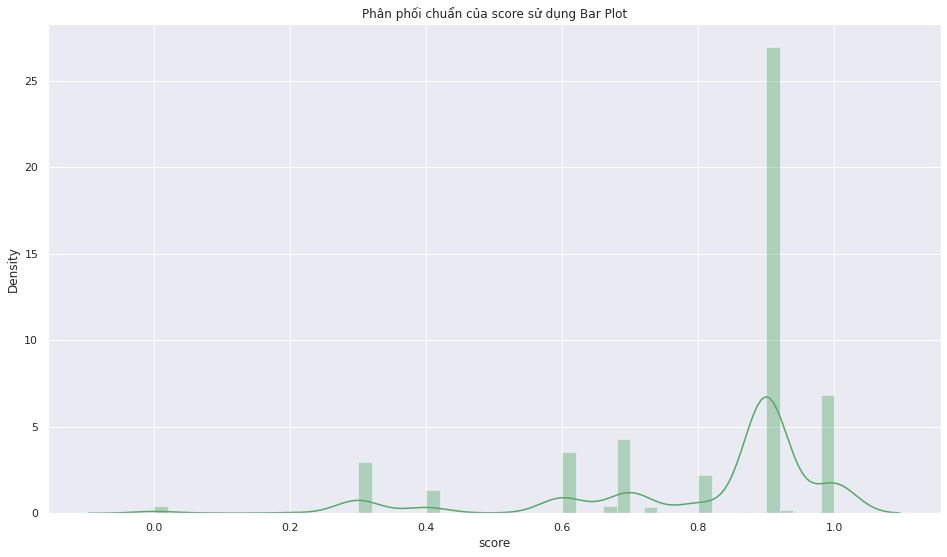

In [ ]:
for col in num_df.columns:
  distplot_graph(col)

**Kiểm tra mức độ tương quan (Correlation)**

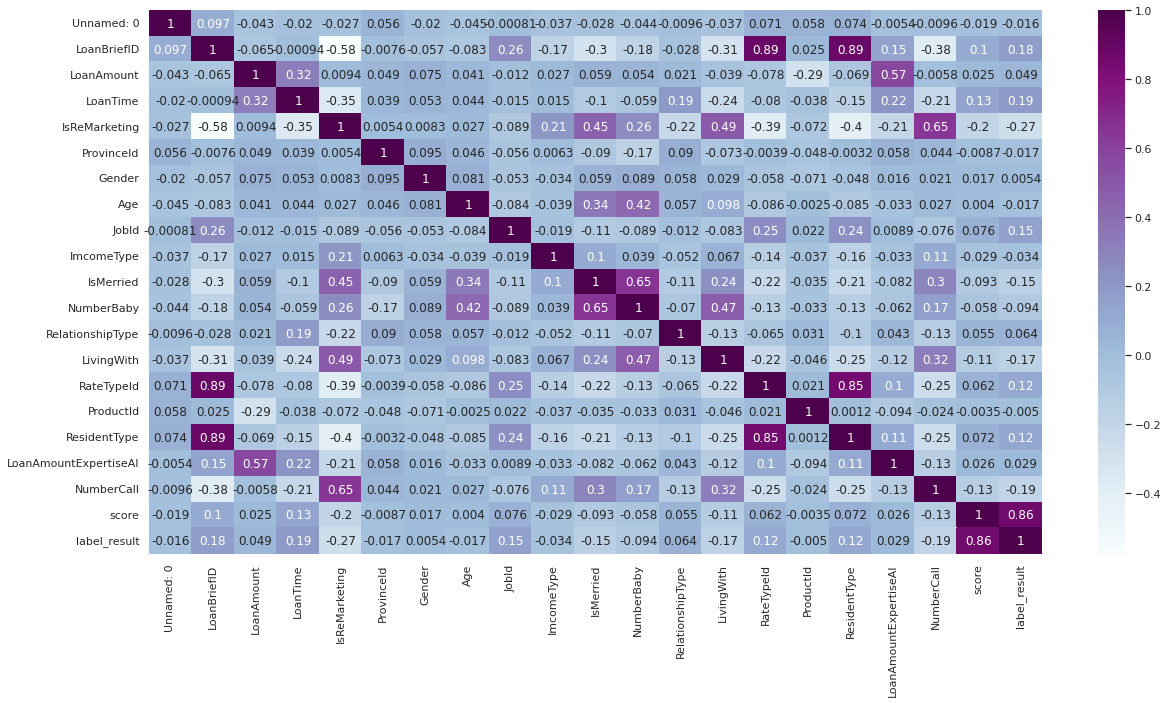

In [ ]:
plt.figure(figsize=(20,10))
corn=df.corr()
sns.heatmap(corn,annot=True,cmap="BuPu")